In [ ]:
'''
 * Copyright (c) 2017 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Basis Expansions and Regularization

### Introduction

We have already made use of models linear in the input features, both for regression and classification. Linear regression, linear discriminant analysis, logistic regression, and separating hyperplanes all rely on a linear model. It is extremely unlikely that the true function $ f(X) $ is actually linear in $ X $. In regression problems, 

$$
f(X) = E(Y | X)
$$ 

will typically be nonlinear and nonadditive in \( X \), and representing \( f(X) \) by a linear model is usually a convenient, and sometimes a necessary, approximation. 

Convenient because a linear model is easy to interpret, and is the first-order Taylor approximation to $ f(X) $. Sometimes necessary, because with \( N \) small and/or \( p \) large, a linear model might be all we are able to fit to the data without overfitting. Likewise in classification, a linear, Bayes-optimal decision boundary implies that some monotone transformation of 

$$
\Pr(Y = 1 | X)
$$ 

is linear in $ X $. This is inevitably an approximation.

In this chapter and the next, we discuss popular methods for moving beyond linearity. The core idea in this chapter is to augment/replace the vector of inputs $ X $ with additional variables, which are transformations of $ X $, and then use linear models in this new space of derived input features. Denote by 

$$
h_m(X) : \mathbb{R}^p \rightarrow \mathbb{R}
$$ 

the \( m \)-th transformation of \( X \), \( m = 1, \ldots, M \). We then model 

$$
f(X) = \sum_{m=1}^{M} \beta_m h_m(X), 
$$ 

a linear basis expansion in $X $. The beauty of this approach is that once the basis functions $ h_m $ have been determined, the models are linear in these new variables, and the fitting proceeds as before.

Some simple and widely used examples of the $ h_m $ are the following:

- $ h_m(X) = X_m, \quad m = 1, \ldots, p $ recovers the original linear model.
- $ h_m(X) = X_j^2 $ or $ h_m(X) = X_j X_k $ allows us to augment the inputs with polynomial terms to achieve higher-order Taylor expansions. Note, however, that the number of variables grows exponentially in the degree of the polynomial. A full quadratic model in \( p \) variables requires 

$$
O(p^2)
$$ 

square and cross-product terms, or more generally 

$$
O(p^d
)$$ 

for a degree-\( d \) polynomial.
- $ h_m(X) = \log(X_j), X_j, \ldots $ permits other nonlinear transformations of single inputs. More generally, one can use similar functions involving several inputs, such as 

$$
h_m(X) = ||X||.
$$
- $ h_m(X) = I(L_m \leq X_k < U_m) $, an indicator for a region of $ X_k $. By breaking the range of $ X_k $ up into $ M_k $ such nonoverlapping regions results in a model with a piecewise constant contribution for $ X_k $.

Sometimes the problem at hand will call for particular basis functions $ h_m $, such as logarithms or power functions. More often, however, we use the basis expansions as a device to achieve more flexible representations for $ f(X) $. Polynomials are an example of the latter, although they are limited by their global nature—tweaking the coefficients to achieve a functional form in one region can cause the function to flap about madly in remote regions.

In this chapter, we consider more useful families of piecewise-polynomials and splines that allow for local polynomial representations. We also discuss the wavelet bases, especially useful for modeling signals and images. These methods produce a dictionary $ D $ consisting of typically a very large number $ |D| $ of basis functions, far more than we can afford to fit to our data. Along with the dictionary, we require a method for controlling the complexity of our model, using basis functions from the dictionary.

There are three common approaches:

1. **Restriction methods**, where we decide beforehand to limit the class of functions. Additivity is an example, where we assume that our model has the form 

$$
f(X) = \sum_{j=1}^{p} f_j(X_j) = \sum_{j=1}^{p} \sum_{m=1}^{M_j} \beta_{jm} h_{jm}(X_j).
$$

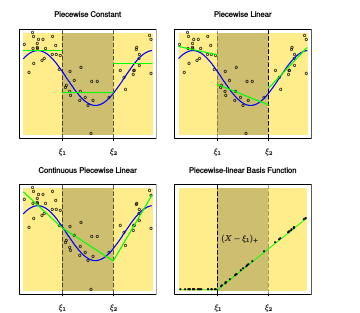

FIGURE .1. The top left panel shows a piecewise constant function ﬁt to some artiﬁcial data. The broken vertical lines indicate the positions of the two knots $ξ1$ and $ξ2$ . The blue curve represents the true function, from which the data were generated with Gaussian noise. The remaining two panels show piecewise lin- ear functions ﬁt to the same data—the top right unrestricted, and the lower left restricted to be continuous at the knots. The lower right panel shows a piecewise– linear basis function, $h3 (X) = (X − ξ1 )+ $, continuous at $ξ1$ . The black points indicate the sample evaluations$ h3 (xi ), i = 1, . . . , N .$
# 5 Basis Expansions and Regularization

## 5.2 Piecewise Polynomials and Splines

We assume until Section 5.7 that $ X $ is one-dimensional. A piecewise polynomial function $ f(X) $ is obtained by dividing the domain of $ X $ into contiguous intervals and representing $ f $ by a separate polynomial in each interval. 

Figure 5.1 shows two simple piecewise polynomials. The first is piecewise constant, with three basis functions:

$$
h_1(X) = I(X < \xi_1), \quad h_2(X) = I(\xi_1 \leq X < \xi_2), \quad h_3(X) = I(\xi_2 \leq X).
$$ 

Since these are positive $ P_3 $ over disjoint regions, the least squares estimate of the model 

$$
f(X) = \sum_{m=1}^{3} \beta_m h_m(X)
$$ 

amounts to 

$$
\hat{\beta}_m = \bar{Y}_m, 
$$ 

the mean of $ Y $ in the $ m $-th region. The top right panel shows a piecewise linear fit. Three additional basis functions are needed:

$$
h_{m+3}(X) = h_m(X)X, \quad m = 1, \ldots, 3.
$$ 

Except in special cases, we would typically prefer the third panel, which is also piecewise linear but restricted to be continuous at the two knots. These continuity restrictions lead to linear constraints on the parameters; for example, 

$$
f(\xi_1^{-}) = f(\xi_1^{+}) 
$$ 

implies that 

$$
\beta_1 + \xi_1 \beta_4 = \beta_2 + \xi_1 \beta_5.
$$ 

In this case, since there are two restrictions, we expect to get back two parameters, leaving four free parameters. A more direct way to proceed in this case is to use a basis that incorporates the constraints:

$$
h_1(X) = 1, \quad h_2(X) = X, \quad h_3(X) = (X - \xi_1)^{+}, \quad h_4(X) = (X - \xi_2)^{+},
$$ 

where $ t^{+} $ denotes the positive part. The function $ h_3 $ is shown in the lower right panel of Figure 5.1. 

We often prefer smoother functions, and these can be achieved by increasing the order of the local polynomial. Figure 5.2 shows a series of piecewise-cubic polynomials fit to the same data, with increasing orders of continuity at the knots. The function in the lower right panel is continuous and has continuous first and second derivatives at the knots. It is known as a cubic spline. 

Enforcing one more order of continuity would lead to a global cubic polynomial. It is not hard to show (Exercise 5.1) that the following basis represents a cubic spline with knots at $ \xi_1 $ and $ \xi_2 $:

$$
h_1(X) = 1, \quad h_2(X) = X, \quad h_3(X) = X^2, \quad h_4(X) = X^3, \quad h_5(X) = (X - \xi_1)^{3+}, \quad h_6(X) = (X - \xi_2)^{3+}.
$$ 

There are six basis functions corresponding to a six-dimensional linear space of functions. A quick check confirms the parameter count: 

$$
(3 \text{ regions}) \times (4 \text{ parameters per region}) - (2 \text{ knots}) \times (3 \text{ constraints per knot}) = 6.
$$ 

More generally, an order-\( M \) spline with knots \( \xi_j, j = 1, \ldots, K \) is a piecewise polynomial of order \( M \), and has continuous derivatives up to order \( M - 2 \). A cubic spline has \( M = 4 \). In fact, the piecewise-constant function in Figure 5.1 is an order-1 spline, while the continuous piecewise linear function is an order-2 spline. Likewise, the general form for the truncated-power basis set would be 

$$
h_j(X) = X^{j-1}, \quad j = 1, \ldots, M, \quad h_{M + \ell}(X) = (X - \xi_{\ell})^{M+}, \quad \ell = 1, \ldots, K.
$$ 

It is claimed that cubic splines are the lowest-order spline for which the knot-discontinuity is not visible to the human eye. There is seldom any good reason to go beyond cubic splines unless one is interested in smooth derivatives. In practice, the most widely used orders are \( M = 1, 2, \) and \( 4 \). 

These fixed-knot splines are also known as regression splines. One needs to select the order of the spline, the number of knots, and their placement. One simple approach is to parameterize a family of splines by the number of basis functions or degrees of freedom, and have the observations \( x_i \) determine the positions of the knots. For example, the expression 

$$
\text{bs}(x, \text{df}=7) 
$$ 

in R generates a basis matrix of cubic-spline functions evaluated at the \( N \) observations in \( x \), with the \( 7 - 3 = 4 \) interior knots at the appropriate percentiles of \( x \) (20th, 40th, 60th, and 80th). One can be more explicit, however; 

$$
\text{bs}(x, \text{degree}=1, \text{knots} = c(0.2, 0.4, 0.6)) 
$$ 

generates a basis for linear splines, with three interior knots, and returns an \( N \times 4 \) matrix. 

Since the space of spline functions of a particular order and knot sequence is a vector space, there are many equivalent bases for representing them (just as there are for ordinary polynomials). While the truncated power basis is conceptually simple, it is not too attractive numerically: powers of large numbers can lead to severe rounding problems. The B-spline basis, described in the Appendix to this chapter, allows for efficient computations even when the number of knots \( K \) is large.

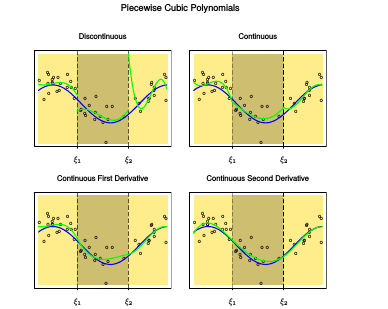

FIGURE. 2. A series of piecewise-cubic polynomials, with increasing orders of continuity.


In [2]:
# Load the Iris dataset manually (for example purposes, we will hardcode a small dataset)
# In a real scenario, you would fetch this data from an external source.

# Sample data: Sepal Length and Sepal Width from the Iris dataset (hardcoded)
X = [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 
     5.4, 4.8, 5.5, 5.0, 5.1, 5.3, 5.5, 6.0, 6.7, 6.3]
y = [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1,
     3.7, 3.4, 3.8, 3.6, 3.5, 3.8, 3.8, 3.4, 3.3, 3.3]

# Sort the data by X and remove duplicates
sorted_indices = sorted(range(len(X)), key=lambda k: X[k])
X_sorted = []
y_sorted = []

for index in sorted_indices:
    if len(X_sorted) == 0 or X[index] != X_sorted[-1]:
        X_sorted.append(X[index])
        y_sorted.append(y[index])

# Function to compute the coefficients of the cubic spline
def cubic_spline(X, y):
    n = len(X)
    
    # Check for sufficient unique points
    if n < 2:
        raise ValueError("At least two unique points are required to fit a spline.")

    h = [X[i+1] - X[i] for i in range(n-1)]
    
    # Set up the system of equations
    A = [[0] * n for _ in range(n)]
    b = [0] * n

    # Natural spline boundary conditions
    A[0][0] = 1
    A[n-1][n-1] = 1

    # Fill the A matrix and b vector
    for i in range(1, n-1):
        A[i][i-1] = h[i-1]
        A[i][i] = 2 * (h[i-1] + h[i])
        A[i][i+1] = h[i]
        
        # Check for zero division risk
        if h[i] == 0 or h[i-1] == 0:
            raise ValueError("Two adjacent X values cannot be equal.")

        b[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])

    # Solve for the second derivatives (c_i) using Gaussian elimination
    for i in range(n):
        for j in range(i+1, n):
            if A[i][i] == 0:
                raise ValueError("Matrix is singular!")
            factor = A[j][i] / A[i][i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]
            b[j] -= factor * b[i]

    c = [0] * n
    for i in range(n-1, -1, -1):
        c[i] = b[i]
        for j in range(i+1, n):
            c[i] -= A[i][j] * c[j]
        c[i] /= A[i][i]

    # Compute the coefficients a, b, and d for the spline segments
    a = y[:-1]
    b = [0] * (n-1)
    d = [0] * (n-1)

    for i in range(n-1):
        b[i] = (y[i+1] - y[i]) / h[i] - (2 * c[i] + c[i+1]) * h[i] / 3
        d[i] = (c[i+1] - c[i]) / (3 * h[i])

    return a, b, c[:-1], d  # Return coefficients for the splines

# Compute the spline coefficients
a, b, c, d = cubic_spline(X_sorted, y_sorted)

# Function to evaluate the spline at a specific point
def evaluate_spline(x, X, a, b, c, d):
    n = len(X)
    # Find the right interval for x
    for i in range(n-1):
        if X[i] <= x <= X[i+1]:
            break
    else:
        raise ValueError("x is out of the range of X.")

    # Calculate the value of the spline
    dx = x - X[i]
    return a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3

# Generate values for plotting the spline
X_new = []
y_new = []
step = 0.1
x_min = min(X_sorted)
x_max = max(X_sorted)
x = x_min

while x <= x_max:
    X_new.append(x)
    y_new.append(evaluate_spline(x, X_sorted, a, b, c, d))
    x += step

# Simple text-based plotting function
def simple_plot(X_sorted, y_sorted, X_new, y_new):
    print("Scatter Points:")
    for x, y in zip(X_sorted, y_sorted):
        print(f"({x}, {y})")

    print("\nSpline Fit:")
    for x, y in zip(X_new, y_new):
        print(f"({x:.2f}, {y:.2f})")

# Print the results
simple_plot(X_sorted, y_sorted, X_new, y_new)


Scatter Points:
(4.4, 2.9)
(4.6, 3.1)
(4.7, 3.2)
(4.8, 3.4)
(4.9, 3.0)
(5.0, 3.6)
(5.1, 3.5)
(5.3, 3.8)
(5.4, 3.9)
(5.5, 3.8)
(6.0, 3.4)
(6.3, 3.3)
(6.7, 3.3)

Spline Fit:
(4.40, 2.90)
(4.50, 3.02)
(4.60, 3.10)
(4.70, 3.20)
(4.80, 3.40)
(4.90, 3.00)
(5.00, 3.60)
(5.10, 3.50)
(5.20, 3.55)
(5.30, 3.80)
(5.40, 3.90)
(5.50, 3.80)
(5.60, 3.68)
(5.70, 3.59)
(5.80, 3.51)
(5.90, 3.45)
(6.00, 3.40)
(6.10, 3.36)
(6.20, 3.32)
(6.30, 3.30)
(6.40, 3.29)
(6.50, 3.29)
(6.60, 3.29)
(6.70, 3.30)


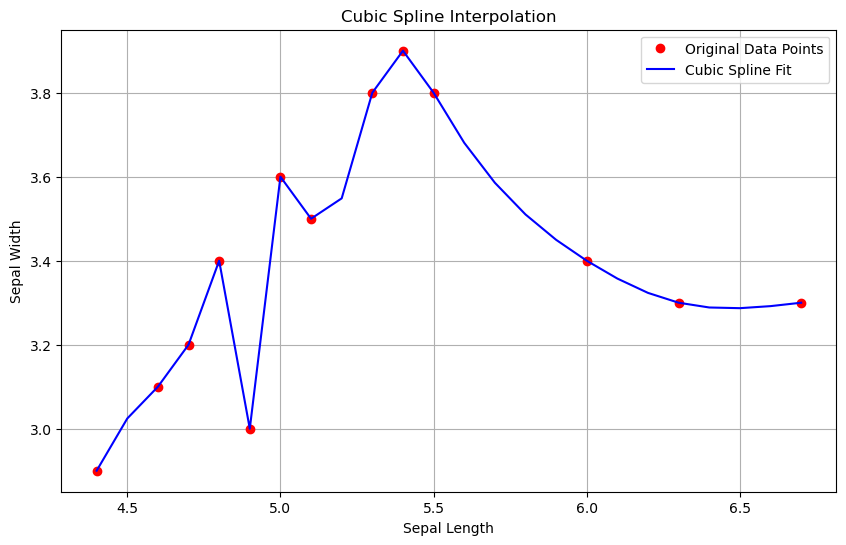

In [4]:
import matplotlib.pyplot as plt

# Sample data: Sepal Length and Sepal Width from the Iris dataset (hardcoded)
X = [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 
     5.4, 4.8, 5.5, 5.0, 5.1, 5.3, 5.5, 6.0, 6.7, 6.3]
y = [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1,
     3.7, 3.4, 3.8, 3.6, 3.5, 3.8, 3.8, 3.4, 3.3, 3.3]

# Sort the data by X and remove duplicates
sorted_indices = sorted(range(len(X)), key=lambda k: X[k])
X_sorted = []
y_sorted = []

for index in sorted_indices:
    if len(X_sorted) == 0 or X[index] != X_sorted[-1]:
        X_sorted.append(X[index])
        y_sorted.append(y[index])

# Function to compute the coefficients of the cubic spline
def cubic_spline(X, y):
    n = len(X)
    
    # Check for sufficient unique points
    if n < 2:
        raise ValueError("At least two unique points are required to fit a spline.")

    h = [X[i+1] - X[i] for i in range(n-1)]
    
    # Set up the system of equations
    A = [[0] * n for _ in range(n)]
    b = [0] * n

    # Natural spline boundary conditions
    A[0][0] = 1
    A[n-1][n-1] = 1

    # Fill the A matrix and b vector
    for i in range(1, n-1):
        A[i][i-1] = h[i-1]
        A[i][i] = 2 * (h[i-1] + h[i])
        A[i][i+1] = h[i]
        
        # Check for zero division risk
        if h[i] == 0 or h[i-1] == 0:
            raise ValueError("Two adjacent X values cannot be equal.")

        b[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])

    # Solve for the second derivatives (c_i) using Gaussian elimination
    for i in range(n):
        for j in range(i+1, n):
            if A[i][i] == 0:
                raise ValueError("Matrix is singular!")
            factor = A[j][i] / A[i][i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]
            b[j] -= factor * b[i]

    c = [0] * n
    for i in range(n-1, -1, -1):
        c[i] = b[i]
        for j in range(i+1, n):
            c[i] -= A[i][j] * c[j]
        c[i] /= A[i][i]

    # Compute the coefficients a, b, and d for the spline segments
    a = y[:-1]
    b = [0] * (n-1)
    d = [0] * (n-1)

    for i in range(n-1):
        b[i] = (y[i+1] - y[i]) / h[i] - (2 * c[i] + c[i+1]) * h[i] / 3
        d[i] = (c[i+1] - c[i]) / (3 * h[i])

    return a, b, c[:-1], d  # Return coefficients for the splines

# Compute the spline coefficients
a, b, c, d = cubic_spline(X_sorted, y_sorted)

# Function to evaluate the spline at a specific point
def evaluate_spline(x, X, a, b, c, d):
    n = len(X)
    # Find the right interval for x
    for i in range(n-1):
        if X[i] <= x <= X[i+1]:
            break
    else:
        raise ValueError("x is out of the range of X.")

    # Calculate the value of the spline
    dx = x - X[i]
    return a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3

# Generate values for plotting the spline
X_new = []
y_new = []
step = 0.1
x_min = min(X_sorted)
x_max = max(X_sorted)
x = x_min

while x <= x_max:
    X_new.append(x)
    y_new.append(evaluate_spline(x, X_sorted, a, b, c, d))
    x += step

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(X_sorted, y_sorted, 'ro', label='Original Data Points')
plt.plot(X_new, y_new, 'b-', label='Cubic Spline Fit')
plt.title('Cubic Spline Interpolation')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.grid()
plt.show()


##  Natural Cubic Splines

We know that the behavior of polynomials fitted to data tends to be erratic near the boundaries, and extrapolation can be dangerous. These problems are exacerbated with splines. The polynomials fitted beyond the boundary knots behave even more wildly than the corresponding global polynomials in that region. This can be conveniently summarized in terms of the pointwise variance of spline functions fitted by least squares (see the example in the next section for details on these variance calculations). 

Figure 5.3 compares a cubic spline with four knots, which is eight-dimensional. The `bs()` function omits by default the constant term in the basis since terms like this are typically included with other terms in the model. The explosion of the variance near the boundaries is clear, and inevitably is worst for cubic splines.

A natural cubic spline adds additional constraints, namely that the function is linear beyond the boundary knots. This frees up four degrees of freedom (two constraints each in both boundary regions), which can be spent more profitably by sprinkling more knots in the interior region. This trade-off is illustrated in terms of variance in Figure 5.3. There will be a price paid in bias near the boundaries, but assuming the function is linear near the boundaries (where we have less information anyway) is often considered reasonable.

A natural cubic spline with \( K \) knots is represented by \( K \) basis functions. One can start from a basis for cubic splines and derive the reduced basis by imposing the boundary constraints. For example, starting from the truncated power series basis described in Section 5.2, we arrive at:

$$
N_1(X) = 1,
$$
$$
N_2(X) = X,
$$
$$
N_{k+2}(X) = d_k(X) - d_{K-1}(X),
$$

where

$$
d_k(X) = \frac{(X - \xi_k)^3 - (X - \xi_K)^3}{\xi_K - \xi_k}.
$$

Each of these basis functions can be seen to have zero second and third derivatives for \( X \geq \xi_K $.

### Example: Iris Dataset


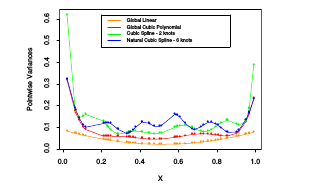

Fig. 3. Pointwise variance curves for four diﬀerent models, with X con- sisting of 50 points drawn at random from U [0, 1], and an assumed error model with constant variance. The linear and cubic polynomial ﬁts have two and four degrees of freedom, respectively, while the cubic spline and natural cubic spline each have six degrees of freedom. The cubic spline has two knots at 0.33 and 0.66, while the natural spline has boundary knots at 0.1 and 0.9, and four interior knots uniformly spaced between them.

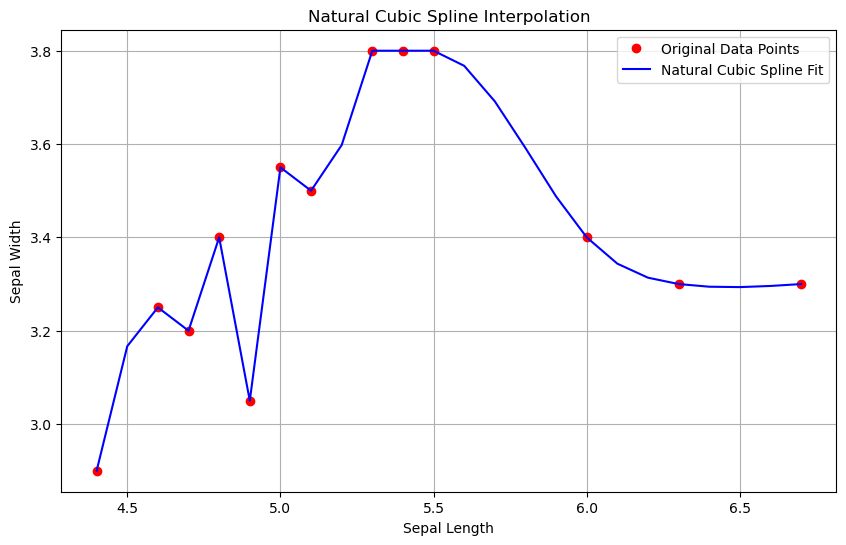

In [6]:
import matplotlib.pyplot as plt

# Sample data: Sepal Length and Sepal Width from the Iris dataset
X = [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 
     5.4, 4.8, 5.5, 5.0, 5.1, 5.3, 5.5, 6.0, 6.7, 6.3]
y = [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1,
     3.7, 3.4, 3.8, 3.6, 3.5, 3.8, 3.8, 3.4, 3.3, 3.3]

# Step 1: Check for duplicates and remove them
unique_points = {}
for x, y_val in zip(X, y):
    if x not in unique_points:
        unique_points[x] = y_val
    else:
        unique_points[x] = (unique_points[x] + y_val) / 2  # Average the y-values for duplicates

X_unique = list(unique_points.keys())
y_unique = list(unique_points.values())

# Sort the data by X
sorted_indices = sorted(range(len(X_unique)), key=lambda k: X_unique[k])
X_sorted = [X_unique[i] for i in sorted_indices]
y_sorted = [y_unique[i] for i in sorted_indices]

# Function to compute the coefficients of the natural cubic spline
def natural_cubic_spline(X, y):
    n = len(X)
    
    # Check for sufficient unique points
    if n < 2:
        raise ValueError("At least two unique points are required to fit a spline.")

    h = [X[i+1] - X[i] for i in range(n-1)]
    
    # Set up the system of equations
    A = [[0] * n for _ in range(n)]
    b = [0] * n

    # Natural spline boundary conditions (c[0] = 0 and c[n-1] = 0)
    A[0][0] = 1
    A[n-1][n-1] = 1

    # Fill the A matrix and b vector
    for i in range(1, n-1):
        A[i][i-1] = h[i-1]
        A[i][i] = 2 * (h[i-1] + h[i])
        A[i][i+1] = h[i]
        
        # Check for division by zero
        if h[i-1] == 0 or h[i] == 0:
            raise ValueError("Two or more X values are equal, which results in division by zero.")

        b[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])

    # Solve for the second derivatives (c_i) using Gaussian elimination
    for i in range(n):
        for j in range(i+1, n):
            if A[i][i] == 0:
                raise ValueError("Matrix is singular!")
            factor = A[j][i] / A[i][i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]
            b[j] -= factor * b[i]

    c = [0] * n
    for i in range(n-1, -1, -1):
        c[i] = b[i]
        for j in range(i+1, n):
            c[i] -= A[i][j] * c[j]
        c[i] /= A[i][i]

    # Compute the coefficients a, b, and d for the spline segments
    a = y[:-1]
    b = [0] * (n-1)
    d = [0] * (n-1)

    for i in range(n-1):
        b[i] = (y[i+1] - y[i]) / h[i] - (2 * c[i] + c[i+1]) * h[i] / 3
        d[i] = (c[i+1] - c[i]) / (3 * h[i])

    return a, b, c[:-1], d  # Return coefficients for the splines

# Compute the spline coefficients
a, b, c, d = natural_cubic_spline(X_sorted, y_sorted)

# Function to evaluate the spline at a specific point
def evaluate_spline(x, X, a, b, c, d):
    n = len(X)
    # Find the right interval for x
    for i in range(n-1):
        if X[i] <= x <= X[i+1]:
            break
    else:
        raise ValueError("x is out of the range of X.")

    # Calculate the value of the spline
    dx = x - X[i]
    return a[i] + b[i] * dx + c[i] * dx**2 + d[i] * dx**3

# Generate values for plotting the spline
X_new = []
y_new = []
step = 0.1
x_min = min(X_sorted)
x_max = max(X_sorted)
x = x_min

while x <= x_max:
    X_new.append(x)
    y_new.append(evaluate_spline(x, X_sorted, a, b, c, d))
    x += step

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(X_sorted, y_sorted, 'ro', label='Original Data Points')
plt.plot(X_new, y_new, 'b-', label='Natural Cubic Spline Fit')
plt.title('Natural Cubic Spline Interpolation')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.grid()
plt.show()
